In [1]:
import paramiko
import sys
import os
import pickle
import numpy as np
sys.path.append(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project')

from execute_remote_scripts import *

%load_ext autoreload
%autoreload 2

C:\Users\Max Tost\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Downloading tailored data from server

In [99]:
remote_script_path = "/home/tost/remote_processing.py"
local_script_path = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts/remote_processing.py"
result_file = "all_JET_data.pkl"

# Execute the remote script and retrieve the results
processed_data = execute_remote_script_download(local_script_path, remote_script_path, result_file)
print(processed_data)

SFTP session established!
Uploaded C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts/remote_processing.py to /home/tost/remote_processing.py
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno96374.mat
Data saved to all_JET_data.pkl
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno92234.mat
Data saved to all_JET_data.pkl
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno94042.mat
Data saved to all_JET_data.pkl
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno96730.mat
Data saved to all_JET_data.pkl
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno96832.mat
Data saved to all_JET_data.pkl
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno95607.mat
Data saved to all_JET_data.pkl
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno100228.mat
Data saved to all_JET_data.pkl
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno84079.mat
Could not process key Flat_top: index 0 is out of bounds for axis 0 with size 0
Data saved to all_JET

## Uploading a script on the server and executing it, no download

In [ ]:
remote_script_path = "/home/tost/check_keys.py"
local_script_path = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts/check_keys.py"

# Execute the remote script and retrieve the results
execute_remote_script(local_script_path, remote_script_path)

SFTP session established!
Uploaded C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts/check_keys.py to /home/tost/check_keys.py


## Plotting files

In [100]:
pickle_file_name = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts\all_JET_data.pkl"  # Example Pickle file name
data = load_pickle(pickle_file_name)

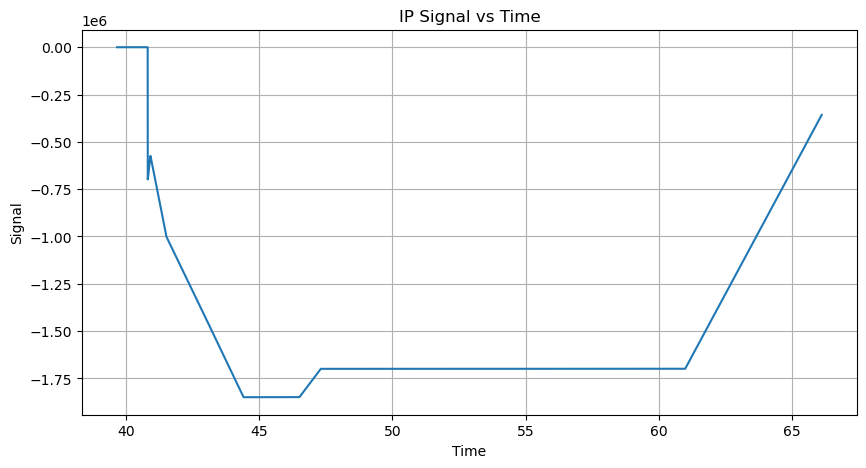

In [14]:
n = 0  # Index of key to plot
shot = -1  # Index of shot to plot

shot_data = data[list(data.keys())[shot]]
keys_jet = ['IP', 'WMHD', 'RNT', 'DAI_EDG7']
plot_data(shot_data, keys_jet[n])

In [78]:
data.keys()

dict_keys(['JETno80962', 'JETno80976', 'JETno80911', 'JETno80821', 'JETno81200', 'JETno80331', 'JETno80822', 'JETno80823', 'JETno80824', 'JETno81197'])

## Installing extensions on server

In [69]:
# Define the paths for the check script
remote_script_path = "/home/tost/check_extensions.py"
local_script_path = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts\check_extensions.py"

# Execute the remote script to check for necessary extensions
execute_remote_script(local_script_path, remote_script_path)

SFTP session established!
Uploaded C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts\check_extensions.py to /home/tost/check_extensions.py
scipy is installed.
paramiko is installed.
h5py is installed.
numpy is installed.
pickle is installed.
torch is NOT installed.
Missing packages: ['torch']

/home/tost/.local/lib/python2.7/site-packages/paramiko/transport.py:33: CryptographyDeprecationWarning: Python 2 is no longer supported by the Python core team. Support for it is now deprecated in cryptography, and will be removed in the next release.
  from cryptography.hazmat.backends import default_backend

SFTP session closed.


In [ ]:
# Define the paths for the install script
remote_script_path = "/home/tost/install_packages.py"
local_script_path = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts\install_packages.py"

# Execute the remote script to install the missing packages
execute_remote_script(local_script_path, remote_script_path)

## Downloading pickle file on server if it exists

In [9]:
# Example usage
remote_file_path = "/home/tost/all_JET_data.pkl"
local_file_path = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\all_JET_data_existing.pkl"

# Download the existing Pickle file
download_existing_pickle(remote_file_path, local_file_path)

SFTP session established!
Attempting to download /home/tost/all_JET_data.pkl to C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\all_JET_data_existing.pkl
Downloaded /home/tost/all_JET_data.pkl to C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\all_JET_data_existing.pkl
SFTP session closed.


In [10]:
pickle_file_name = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\all_JET_data_existing.pkl"  # Example Pickle file name
data = load_pickle(pickle_file_name)

## Opening csv file with RE detected shots

In [15]:
import numpy as np
import csv

# Read the shot numbers from the CSV file
shot_numbers = []
with open(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\automatic_RE_numbers.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        shot_numbers.append(int(row[0]))

# Convert the list of shot numbers to a NumPy array
shot_numbers_array = np.array(shot_numbers)

print(len(shot_numbers_array))

689
